In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#import geopandas as gpd
#from geopandas import GeoSeries, GeoDataFrame
#from geopy.distance import geodesic

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

sns.set_style('ticks')

pd.set_option('display.max_columns', None)

%matplotlib inline

# # installing less common packages (uncomment if you do not have these installed)
# !pip install geopy
# !pip install geopandas

In [127]:
train = pd.read_csv('../data/train.csv', parse_dates=['Date'])
test = pd.read_csv('../data/test.csv', parse_dates=['Date'])
spray = pd.read_csv('../data/spray.csv', parse_dates=['Date'])
weather = pd.read_csv('../data/weather.csv', parse_dates=['Date'])

In [11]:
train.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    10506 non-null  datetime64[ns]
 1   Address                 10506 non-null  object        
 2   Species                 10506 non-null  object        
 3   Block                   10506 non-null  int64         
 4   Street                  10506 non-null  object        
 5   Trap                    10506 non-null  object        
 6   AddressNumberAndStreet  10506 non-null  object        
 7   Latitude                10506 non-null  float64       
 8   Longitude               10506 non-null  float64       
 9   AddressAccuracy         10506 non-null  int64         
 10  NumMosquitos            10506 non-null  int64         
 11  WnvPresent              10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), ob

In [13]:
train.Species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [14]:
test.Species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

In [15]:
test['Species'].value_counts()

CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX PIPIENS             14521
CULEX SALINARIUS          14355
CULEX TERRITANS           14351
CULEX TARSALIS            14347
CULEX ERRATICUS           14345
UNSPECIFIED CULEX         14345
Name: Species, dtype: int64

In [16]:
train['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [17]:
test.head()

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

### Train data EDA

#### Distribution of target variable against mosquito species

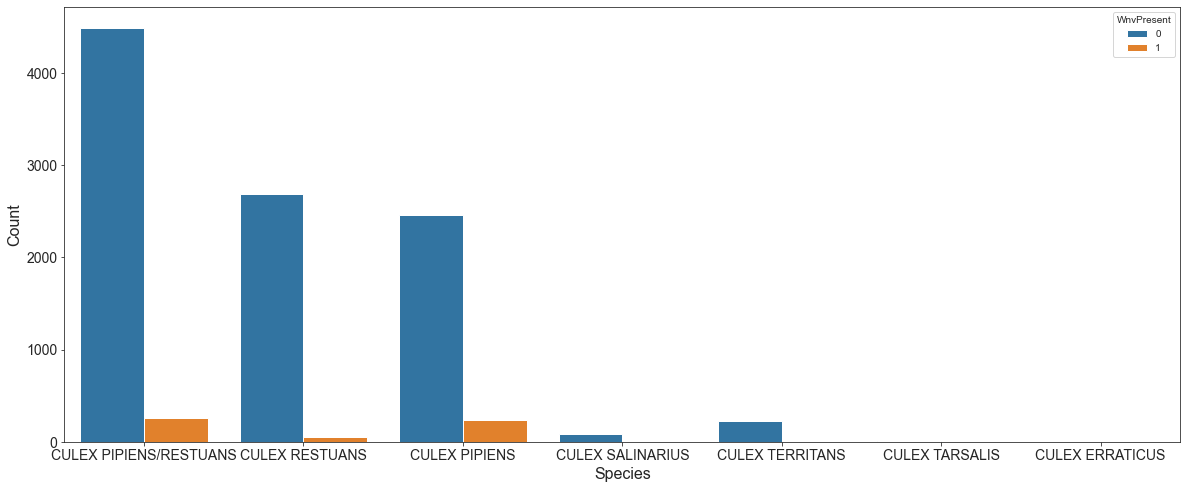

In [79]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(x='Species',data=train,hue='WnvPresent')


plt.xlabel("Species", size = 16)
plt.ylabel("Count", size = 16)
plt.xticks(size=14)
plt.yticks(size=14);

From the barchart above, the most common found mosquito species are the Culex Pipien/ Restuans, Culex Restuans and Culex Pipiens which have much larger total trap counts making up >96% of the sampled species compared to the other species, with the Culex Erraticus having the lowest count of just 1. 

WNV is also only detected in these 3 species from the samples collected. 

In [80]:
species_wnv = train[['Species', 'NumMosquitos', 'WnvPresent']].groupby(by='Species').sum()
species_wnv

NumMosquitos  WnvPresent
Species                                         
CULEX ERRATICUS                    7           0
CULEX PIPIENS                  44671         240
CULEX PIPIENS/RESTUANS         66268         262
CULEX RESTUANS                 23431          49
CULEX SALINARIUS                 145           0
CULEX TARSALIS                     7           0
CULEX TERRITANS                  510           0

#### Create Year, Month and Week columns

In [128]:
train['Year'] = train['Date'].apply(lambda x:x.year)
train['Month'] = train['Date'].apply(lambda x:x.month)
train['WeekofYear'] = train['Date'].apply(lambda x:x.weekofyear)

#### Mosquito numbers and WNV presence across different months

In [129]:
month_wnv = train[['Month','NumMosquitos', 'WnvPresent']].groupby(by='Month').sum()
month_wnv

NumMosquitos  WnvPresent
Month                          
1             10300          44
2              4352           6
3               681           1
4              1897          10
5              3700          15
6             17930          35
7             28488          51
8             41944         305
9             10167          32
10             1425           0
11             3194           0
12            10961          52

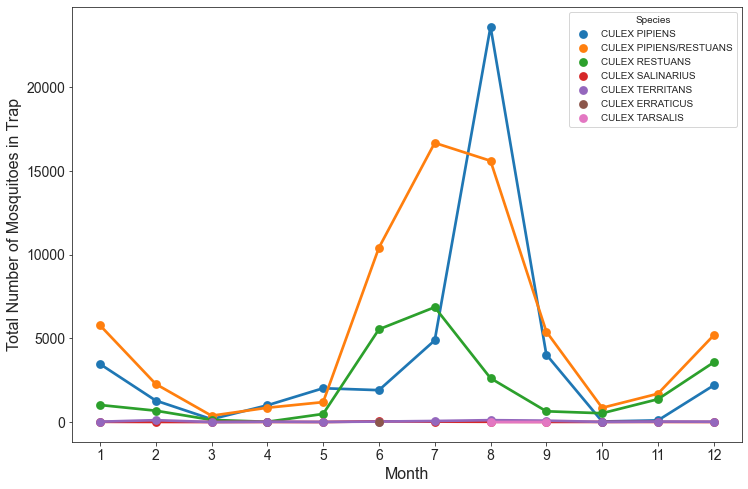

In [130]:
fig, ax = plt.subplots(figsize=(12,8))
#sns.pointplot(x='Month', y="NumMosquitos", hue='Species', data=train[train['Species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])].groupby(['Month', 'Species'], as_index=False)['NumMosquitos'].mean(),)
sns.pointplot(x='Month', y="NumMosquitos", hue='Species', data=train.groupby(['Month','Species'], as_index=False)['NumMosquitos'].sum(),)

plt.ylabel('Number of Mosquitoes in Trap')

plt.xlabel("Month", size = 16)
plt.ylabel("Total Number of Mosquitoes in Trap", size = 16)
plt.xticks(size=14)
plt.yticks(size=14);

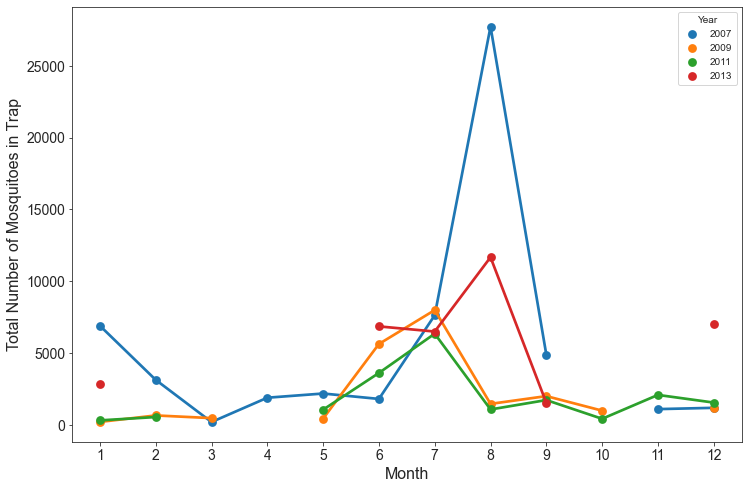

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
#sns.pointplot(x='Month', y="NumMosquitos", hue='Species', data=train[train['Species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])].groupby(['Month', 'Species'], as_index=False)['NumMosquitos'].mean(),)
sns.pointplot(x='Month', y="NumMosquitos", hue='Year', data=train.groupby(['Year', 'Month'], as_index=False)['NumMosquitos'].sum(),)

plt.ylabel('Average Number of Mosquitoes in Trap')

plt.xlabel("Month", size = 16)
plt.ylabel("Total Number of Mosquitoes in Trap", size = 16)
plt.xticks(size=14)
plt.yticks(size=14);

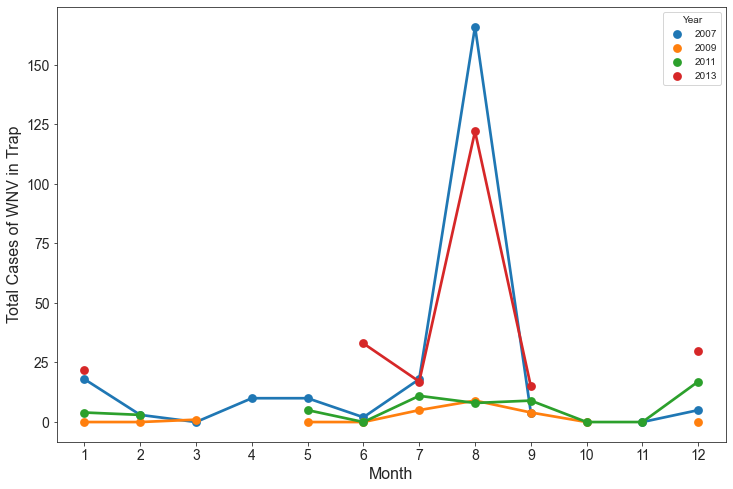

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
sns.pointplot(x='Month', y="WnvPresent", hue="Year", data=train.groupby(['Year', 'Month'], as_index=False)['WnvPresent'].sum(),)

plt.xlabel('Month', size=16)
plt.ylabel('Total Cases of WNV in Trap', size=16)
plt.xticks(size=14)
plt.yticks(size=14);

From the line charts above, the mosquito population and WNV case counts are at their peak in August,and varies across years with an apparent spike in 2007.

#### WNV Epicentre

In [8]:
street_wnv = train[['AddressNumberAndStreet','NumMosquitos', 'WnvPresent']].groupby(by='AddressNumberAndStreet').sum().sort_values('WnvPresent', ascending=False)
street_wnv

NumMosquitos  WnvPresent
AddressNumberAndStreet                                         
1000  W OHARE AIRPORT, Chicago, IL            15386          66
1200  S DOTY AVE, Chicago, IL                 21668          41
4100  N OAK PARK AVE, Chicago, IL              3710          18
1000  S STONY ISLAND AVE, Chicago, IL          9936          16
4600  N MILWAUKEE AVE, Chicago, IL             1346          14
...                                             ...         ...
2500  S THROOP, Chicago, IL                      33           0
6500  S RACINE AVE, Chicago, IL                  17           0
2200  W PERSHING RD, Chicago, IL                 23           0
4900  W BALMORAL AVE, Chicago, IL                72           0
9800  S AVENUE G, Chicago, IL                   239           0

[138 rows x 2 columns]

In [26]:
# Create additional feature for distance between the 2 epicentres? 
# Hypothesis is nearer the location is to the epicentre, higher the chance of WNV presence 

## Data Cleaning

### Weather Data

In [27]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   object        
 5   Depart       2944 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2944 non-null   object        
 8   Heat         2944 non-null   object        
 9   Cool         2944 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        2944 non-null   object        
 14  Water1       2944 non-null   object        
 15  SnowFall     2944 non-null   object        
 16  Precip

#### Impute missing values

In [131]:
# Check for missing values for weather data. Replace placeholders with np.nan
def clean_nan(x): 
    if str(x) in ['','T',' T', '  T','M', '-']:
        return np.nan
    else:
        return x
weather = weather.applymap(clean_nan)

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   object        
 5   Depart       1472 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2933 non-null   object        
 9   Cool         2933 non-null   object        
 10  Sunrise      1472 non-null   object        
 11  Sunset       1472 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       0 non-null      float64       
 15  SnowFall     1460 non-null   object        
 16  Precip

In [132]:
percent_missing = weather.isnull().sum() * 100 / len(weather)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

percent_missing
Station             0.000000
Date                0.000000
Tmax                0.000000
Tmin                0.000000
Tavg                0.373641
Depart             50.000000
DewPoint            0.000000
WetBulb             0.135870
Heat                0.373641
Cool                0.373641
Sunrise            50.000000
Sunset             50.000000
CodeSum             0.000000
Depth              50.000000
Water1            100.000000
SnowFall           50.407609
PrecipTotal        10.869565
StnPressure         0.135870
SeaLevel            0.305707
ResultSpeed         0.000000
ResultDir           0.000000
AvgSpeed            0.101902

In [133]:
# 50% missing values for some variables due to data not normally collected from Station 2
weather[['Station','Date','Depart','Sunrise','Sunset','Depth','SnowFall']]

Station       Date Depart Sunrise Sunset Depth SnowFall
0           1 2007-01-05     14     448   1849     0        0
1           2 2007-01-05    NaN     NaN    NaN   NaN      NaN
2           1 2007-02-05     -3     447   1850     0        0
3           2 2007-02-05    NaN     NaN    NaN   NaN      NaN
4           1 2007-03-05      2     446   1851     0        0
...       ...        ...    ...     ...    ...   ...      ...
2939        2 2014-10-29    NaN     NaN    NaN   NaN      NaN
2940        1 2014-10-30     -4     622   1649     0        0
2941        2 2014-10-30    NaN     NaN    NaN   NaN      NaN
2942        1 2014-10-31     -6     623   1647     0      0.1
2943        2 2014-10-31    NaN     NaN    NaN   NaN      NaN

[2944 rows x 7 columns]

In [134]:
# Impute missing value for Tavg, which is actually average of Tmax and Tmin
weather.Tavg = (weather.Tmax + weather.Tmin)/2

# Drop 'Water1' column with 100% missing values
weather = weather.drop(labels=['Water1'], axis=1)

In [14]:
weather['SnowFall'].value_counts()

0      1459
0.1       1
Name: SnowFall, dtype: int64

In [135]:
# Drop 'SnowFall' column as almost all 'SnowFall' values are 0 or null which offer no addtional information
weather = weather.drop(labels=['SnowFall'], axis=1)

In [15]:
weather['Depth'].value_counts()

0    1472
Name: Depth, dtype: int64

In [136]:
# Drop 'Depth' column as all values are 0 which offer no addtional information
weather = weather.drop(labels=['Depth'], axis=1)

#### Create Humidity column 

Our hypothesis is that mosquitoes tend to thrive in humid environment. 

In [137]:
# Convert temperature to celsius
Tavg_C = ((weather['Tavg'] - 32) * 5 / 9)
DewPoint_C = ((weather['DewPoint'] - 32) * 5 / 9)
# Calculate vapour pressure and actual pressure
VapPress_Sat = np.exp((17.625 * Tavg_C) / (Tavg_C + 243.04))
VapPress_Act = np.exp((17.625 * DewPoint_C) / (DewPoint_C + 243.04))
# Calculate relative humidity
Rel_Humidity = (VapPress_Act / VapPress_Sat) * 100

weather['Rel_Humidity'] = Rel_Humidity

#### Create Night hours column 

Our hypothesis is that mosquitoes tend to come out at night hence mosquitoes activity could be higher when night hours are longer.

In [19]:
weather['Sunrise'].unique()

array(['448', nan, '447', '446', '444', '443', '442', '441', '439', '438',
       '437', '436', '435', '434', '433', '432', '431', '430', '429',
       '428', '427', '426', '425', '424', '423', '422', '421', '420',
       '419', '418', '417', '416', '440', '445', '449', '450', '451',
       '452', '453', '454', '455', '456', '457', '458', '459', '500',
       '501', '502', '503', '504', '505', '506', '508', '509', '510',
       '511', '512', '513', '514', '515', '516', '517', '518', '519',
       '520', '521', '522', '523', '524', '525', '526', '527', '528',
       '529', '530', '531', '532', '533', '535', '536', '537', '538',
       '539', '540', '541', '542', '543', '544', '545', '546', '547',
       '548', '549', '550', '552', '553', '554', '555', '556', '557',
       '558', '559', '600', '602', '603', '604', '605', '606', '607',
       '608', '610', '611', '612', '613', '614', '616', '617', '618',
       '619', '620', '622', '623'], dtype=object)

In [20]:
weather['Sunset'].unique()

array(['1849', nan, '1850', '1851', '1852', '1853', '1855', '1856',
       '1857', '1858', '1859', '1860', '1901', '1902', '1903', '1904',
       '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912',
       '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920',
       '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928',
       '1929', '1930', '1931', '1900', '1854', '1848', '1846', '1845',
       '1843', '1842', '1840', '1839', '1837', '1835', '1834', '1832',
       '1831', '1829', '1827', '1826', '1824', '1822', '1821', '1819',
       '1817', '1815', '1814', '1812', '1810', '1809', '1807', '1805',
       '1803', '1760', '1758', '1756', '1755', '1753', '1751', '1749',
       '1748', '1746', '1744', '1742', '1741', '1739', '1737', '1735',
       '1734', '1732', '1730', '1729', '1727', '1725', '1724', '1722',
       '1720', '1719', '1717', '1715', '1714', '1712', '1711', '1709',
       '1707', '1706', '1704', '1703', '1701', '1660', '1658', '1657',
       '1

In [138]:
# Cleaning up wrong formatted of Sunset time, e.g. 1760 hrs should be changed to 1800 hours

weather_sun = weather.loc[weather['Station'] == 1].copy()

weather_sun['Sunset'] = weather_sun['Sunset'].map(lambda x : (str(int(x[0:2]) + 1) + '00') if x[2:4] == '60' else x)

weather_sun['Sunrise_Time'] = weather_sun['Sunrise'].map(lambda x : dt.datetime.strptime(x, '%H%M'))
weather_sun['Sunset_Time'] = weather_sun['Sunset'].map(lambda x : dt.datetime.strptime(x, '%H%M'))
weather_sun['Night_Hours'] = (1440 - (weather_sun['Sunset_Time'] - weather_sun['Sunrise_Time']).map(lambda x : x.seconds / 60))/60

In [139]:
# Merge back to main weather dataframe
weather = weather.merge(weather_sun[['Date', 'Night_Hours']], on = 'Date')
weather = weather.drop(labels=['Sunrise','Sunset'], axis=1)

In [101]:
weather.head()

Station       Date  Tmax  Tmin  Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1 2007-05-01    83    50  66.5     14        51      56    0    2   
1        2 2007-05-01    84    52  68.0    NaN        51      57    0    3   
2        1 2007-05-02    59    42  50.5     -3        42      47   14    0   
3        2 2007-05-02    60    43  51.5    NaN        42      47   13    0   
4        1 2007-05-03    66    46  56.0      2        40      48    9    0   

  CodeSum PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  \
0                0.00       29.10    29.82          1.7         27      9.2   
1                0.00       29.18    29.82          2.7         25      9.6   
2      BR        0.00       29.38    30.09         13.0          4     13.4   
3   BR HZ        0.00       29.44    30.08         13.3          2     13.4   
4                0.00       29.39    30.12         11.7          7     11.9   

   Rel_Humidity  Night_Hours  
0     57.422798     9.983333  
1     54.526426     9.983333  
2     72.526813     9.950000  
3     69.892062     9.950000  
4     54.874919     9.916667

#### Convert numeric columns to numeric data types

In [140]:
num_cols = ['Station', 'Tmax', 'Tmin', 'Tavg', 
            'Depart', 'DewPoint','WetBulb', 'Heat',
            'Cool', 'PrecipTotal']

weather[num_cols] = weather[num_cols].applymap(pd.to_numeric)

In [141]:
weather.SeaLevel = weather.SeaLevel.astype(float)
weather.AvgSpeed = weather.AvgSpeed.astype(float)
weather.StnPressure = weather.StnPressure.astype(float)

#### Create columns for significant weather events 

In [142]:
code_sum_list = []

def get_code_sum_elems(code_sum_string):
    code_sum_list 
    code_sum_list.extend(code_sum_string.split())
    return True

for i in weather['CodeSum']:
    get_code_sum_elems(i.strip())

code_sum_set = set(code_sum_list)
code_sum_set

{'BCFG',
 'BR',
 'DZ',
 'FG',
 'FG+',
 'FU',
 'GR',
 'HZ',
 'MIFG',
 'RA',
 'SN',
 'SQ',
 'TS',
 'TSRA',
 'VCFG',
 'VCTS'}

In [143]:
# Create a column for each CodeSum element
for i in code_sum_set:
    weather[i] = np.nan
    
for index, row in weather.iterrows():
    codesum_list = row['CodeSum'].split() 
    for j in codesum_list:
        #set corresponding column to 1
        if j in code_sum_set:
            weather.loc[index,j]=1

In [144]:
weather.drop(labels='CodeSum',axis=1,inplace=True)

In [28]:
weather.head()

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
0        1 2007-01-05    83    50  66.5    14.0        51     56.0   0.0   
1        2 2007-01-05    84    52  68.0     NaN        51     57.0   0.0   
2        1 2007-02-05    59    42  50.5    -3.0        42     47.0  14.0   
3        2 2007-02-05    60    43  51.5     NaN        42     47.0  13.0   
4        1 2007-03-05    66    46  56.0     2.0        40     48.0   9.0   

   Cool  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  \
0   2.0          0.0        29.10     29.82          1.7         27       9.2   
1   3.0          0.0        29.18     29.82          2.7         25       9.6   
2   0.0          0.0        29.38     30.09         13.0          4      13.4   
3   0.0          0.0        29.44     30.08         13.3          2      13.4   
4   0.0          0.0        29.39     30.12         11.7          7      11.9   

   Rel_Humidity  Night_Hours  FG  TSRA  VCTS  FG+   HZ  RA  DZ  FU   BR  SQ  \
0     57.422798     9.983333 NaN   NaN   NaN  NaN  NaN NaN NaN NaN  NaN NaN   
1     54.526426     9.983333 NaN   NaN   NaN  NaN  NaN NaN NaN NaN  NaN NaN   
2     72.526813     9.950000 NaN   NaN   NaN  NaN  NaN NaN NaN NaN  1.0 NaN   
3     69.892062     9.950000 NaN   NaN   NaN  NaN  1.0 NaN NaN NaN  1.0 NaN   
4     54.874919     9.916667 NaN   NaN   NaN  NaN  NaN NaN NaN NaN  NaN NaN   

   SN  TS  VCFG  BCFG  GR  MIFG  
0 NaN NaN   NaN   NaN NaN   NaN  
1 NaN NaN   NaN   NaN NaN   NaN  
2 NaN NaN   NaN   NaN NaN   NaN  
3 NaN NaN   NaN   NaN NaN   NaN  
4 NaN NaN   NaN   NaN NaN   NaN

#### Create Year, Month and Week columns

In [145]:
weather['Year'] = weather['Date'].apply(lambda x:x.year)
weather['Month'] = weather['Date'].apply(lambda x:x.month)
weather['WeekofYear'] = weather['Date'].apply(lambda x:x.weekofyear)

#### Compare differences between weather data collected by Station 1 and Station 2

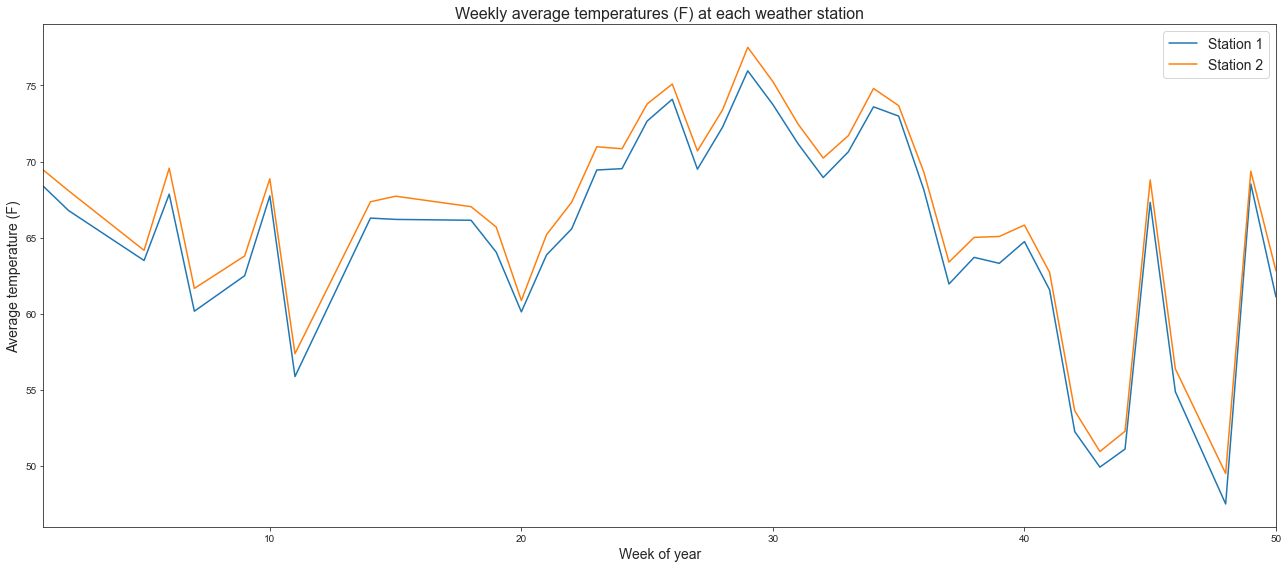

In [146]:
# plot weekly temperature by station
plt.figure(figsize=(18,8))
sns.lineplot(x = 'WeekofYear',y = 'Tavg', data = weather[weather.Station==1], ci = None, label = "Station 1")
sns.lineplot(x = 'WeekofYear',y = 'Tavg', data = weather[weather.Station==2], ci = None, label = "Station 2")
plt.legend(fontsize = 14)
plt.title('Weekly average temperatures (F) at each weather station', fontsize=16)
plt.xlabel('Week of year',fontsize=14)
plt.ylabel('Average temperature (F)',fontsize=14)
plt.xlim(weather.WeekofYear.min(), weather.WeekofYear.max())
plt.tight_layout()

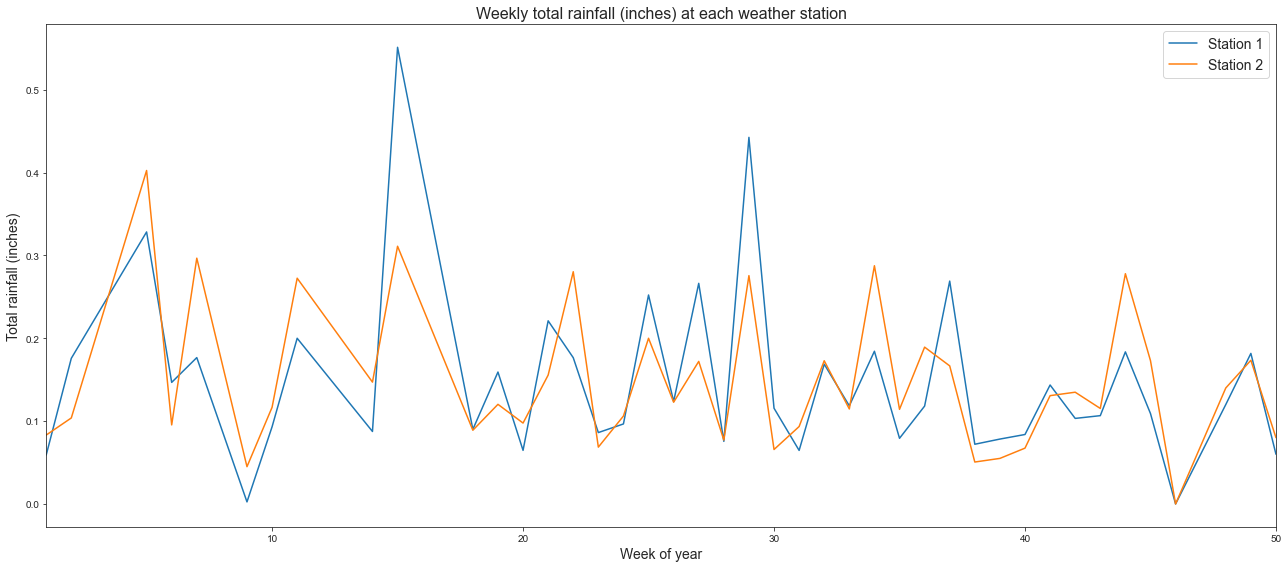

In [147]:
# plot weekly rainfall by station
plt.figure(figsize=(18,8))
sns.lineplot(x = 'WeekofYear',y = 'PrecipTotal',data = weather[weather.Station==1],ci = None,label = "Station 1")
sns.lineplot(x = 'WeekofYear',y = 'PrecipTotal',data = weather[weather.Station==2],ci = None,label = "Station 2")
plt.legend(fontsize = 14)
plt.title('Weekly total rainfall (inches) at each weather station', fontsize=16)
plt.xlabel('Week of year',fontsize=14)
plt.ylabel('Total rainfall (inches)',fontsize=14)
plt.xlim(weather.WeekofYear.min(), weather.WeekofYear.max())
plt.tight_layout()

From background, temperature and rainfall are likely to have bigger effect on mosquito activity. Based on the weekly temperature and rainfall line charts above, the trending seems to be similar between the two weather stations, with some slight differences due to location and perhaps instrument calibration. A decision was taken to combine the weather data of the 2 weather stations to derive the mean weather for a particular day. 

#### Combine data from the 2 weather stations

In [148]:
weather_combined = weather.groupby('Date').mean()
weather_combined.drop(['Station', 'Year','Month','WeekofYear'],axis=1,inplace=True)
weather_combined.reset_index(inplace=True)

In [149]:
# adding year/month/week columns back as they were previously affected by the groupby function and removed
weather_combined['year'] = weather_combined['Date'].apply(lambda x:x.year)
weather_combined['month'] = weather_combined['Date'].apply(lambda x:x.month)
weather_combined['weekofyear'] = weather_combined['Date'].apply(lambda x:x.weekofyear)


In [113]:
weather_combined.head()

Date  Tmax  Tmin   Tavg  Depart  DewPoint  WetBulb  Heat  Cool  \
0 2007-05-01  83.5  51.0  67.25    14.0      51.0     56.5   0.0   2.5   
1 2007-05-02  59.5  42.5  51.00    -3.0      42.0     47.0  13.5   0.0   
2 2007-05-03  66.5  47.0  56.75     2.0      40.0     49.0   8.0   0.0   
3 2007-05-04  72.0  50.0  61.00     4.0      41.5     50.0   7.0   0.0   
4 2007-05-05  66.0  53.5  59.75     5.0      38.5     49.5   5.0   0.0   

   PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  \
0          0.0       29.140    29.820         2.20       26.0      9.40   
1          0.0       29.410    30.085        13.15        3.0     13.40   
2          0.0       29.425    30.120        12.30        6.5     12.55   
3          0.0       29.335    30.045        10.25        7.5     10.60   
4          NaN       29.430    30.095        11.45        7.0     11.75   

   Rel_Humidity  Night_Hours  FU  VCTS  SQ  DZ   BR  BCFG  TS  MIFG  VCFG  GR  \
0     55.974612     9.983333 NaN   NaN NaN NaN  NaN   NaN NaN   NaN   NaN NaN   
1     71.209437     9.950000 NaN   NaN NaN NaN  1.0   NaN NaN   NaN   NaN NaN   
2     53.429105     9.916667 NaN   NaN NaN NaN  NaN   NaN NaN   NaN   NaN NaN   
3     48.932050     9.866667 NaN   NaN NaN NaN  NaN   NaN NaN   NaN   NaN NaN   
4     45.237980     9.833333 NaN   NaN NaN NaN  NaN   NaN NaN   NaN   NaN NaN   

   TSRA  SN   HZ  FG+  FG   RA  year  month  weekofyear  
0   NaN NaN  NaN  NaN NaN  NaN  2007      5          18  
1   NaN NaN  1.0  NaN NaN  NaN  2007      5          18  
2   NaN NaN  1.0  NaN NaN  NaN  2007      5          18  
3   NaN NaN  NaN  NaN NaN  1.0  2007      5          18  
4   NaN NaN  NaN  NaN NaN  NaN  2007      5          18

In [114]:
weather_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1472 non-null   datetime64[ns]
 1   Tmax          1472 non-null   float64       
 2   Tmin          1472 non-null   float64       
 3   Tavg          1472 non-null   float64       
 4   Depart        1472 non-null   float64       
 5   DewPoint      1472 non-null   float64       
 6   WetBulb       1472 non-null   float64       
 7   Heat          1472 non-null   float64       
 8   Cool          1472 non-null   float64       
 9   PrecipTotal   1408 non-null   float64       
 10  StnPressure   1471 non-null   float64       
 11  SeaLevel      1472 non-null   float64       
 12  ResultSpeed   1472 non-null   float64       
 13  ResultDir     1472 non-null   float64       
 14  AvgSpeed      1472 non-null   float64       
 15  Rel_Humidity  1472 non-null   float64 

In [150]:
weather_combined['PrecipTotal'].value_counts()

0.000    804
0.010     56
0.005     28
0.020     25
0.040     19
        ... 
0.940      1
0.285      1
1.330      1
0.705      1
0.560      1
Name: PrecipTotal, Length: 214, dtype: int64

In [151]:
# Fill null values with '0' for PrecipTotal as majority of the values are '0'
weather_combined['PrecipTotal'].fillna(0, inplace = True) 

In [152]:
weather_combined['StnPressure'].describe()

count    1471.000000
mean       29.284426
std         0.155539
min        28.590000
25%        29.195000
50%        29.290000
75%        29.380000
max        29.825000
Name: StnPressure, dtype: float64

In [153]:
# Fill null values with mean value for StnPressure as there is little variation in the station pressure values. 
weather_combined['StnPressure'].fillna(29.284, inplace = True) 

In [154]:
# Fill null values with 0 for weather event columns
weather_combined.replace(np.nan,0, inplace=True)


In [120]:
weather_combined.head()

Date  Tmax  Tmin   Tavg  Depart  DewPoint  WetBulb  Heat  Cool  \
0 2007-05-01  83.5  51.0  67.25    14.0      51.0     56.5   0.0   2.5   
1 2007-05-02  59.5  42.5  51.00    -3.0      42.0     47.0  13.5   0.0   
2 2007-05-03  66.5  47.0  56.75     2.0      40.0     49.0   8.0   0.0   
3 2007-05-04  72.0  50.0  61.00     4.0      41.5     50.0   7.0   0.0   
4 2007-05-05  66.0  53.5  59.75     5.0      38.5     49.5   5.0   0.0   

   PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  \
0          0.0       29.140    29.820         2.20       26.0      9.40   
1          0.0       29.410    30.085        13.15        3.0     13.40   
2          0.0       29.425    30.120        12.30        6.5     12.55   
3          0.0       29.335    30.045        10.25        7.5     10.60   
4          0.0       29.430    30.095        11.45        7.0     11.75   

   Rel_Humidity  Night_Hours   FU  VCTS   SQ   DZ   BR  BCFG   TS  MIFG  VCFG  \
0     55.974612     9.983333  0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
1     71.209437     9.950000  0.0   0.0  0.0  0.0  1.0   0.0  0.0   0.0   0.0   
2     53.429105     9.916667  0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
3     48.932050     9.866667  0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
4     45.237980     9.833333  0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0   

    GR  TSRA   SN   HZ  FG+   FG   RA  year  month  weekofyear  
0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  2007      5          18  
1  0.0   0.0  0.0  1.0  0.0  0.0  0.0  2007      5          18  
2  0.0   0.0  0.0  1.0  0.0  0.0  0.0  2007      5          18  
3  0.0   0.0  0.0  0.0  0.0  0.0  1.0  2007      5          18  
4  0.0   0.0  0.0  0.0  0.0  0.0  0.0  2007      5          18

## Exploratory Data Analysis

### Weather EDA

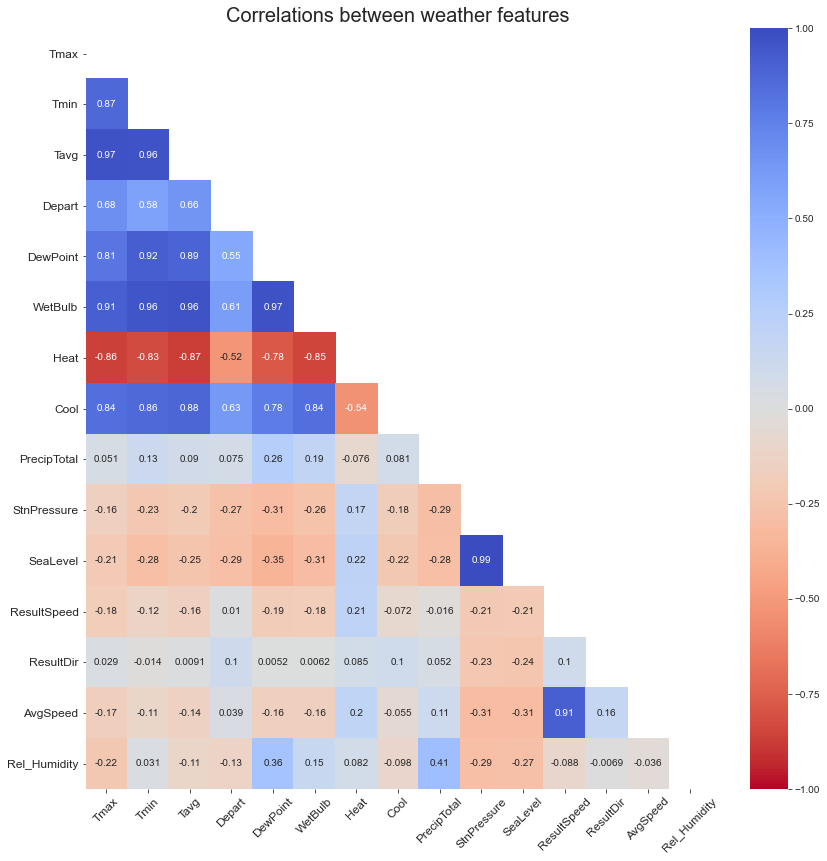

In [155]:
weather_corr = weather_combined[['Tmax','Tmin','Tavg','Depart','DewPoint','WetBulb','Heat','Cool','PrecipTotal',\
                                'StnPressure','SeaLevel','ResultSpeed','ResultDir','AvgSpeed','Rel_Humidity']].corr() 

mask = np.zeros_like(weather_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(14,14))

ax = sns.heatmap(weather_corr, vmin=-1, vmax=1, mask=mask, annot = True, cmap = 'coolwarm_r')

ax.set_title('Correlations between weather features', size = 20)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

plt.show()

In [156]:
# Drop weather variables with multi-collinearity; coefficient >= 0.9

weather_combined = weather_combined.drop(['SeaLevel', 'Tmax', 'Tmin', 'WetBulb', 'DewPoint', 'ResultSpeed'], axis = 1) 

Text(0.5, 1.0, 'Distribution of Night Duration')

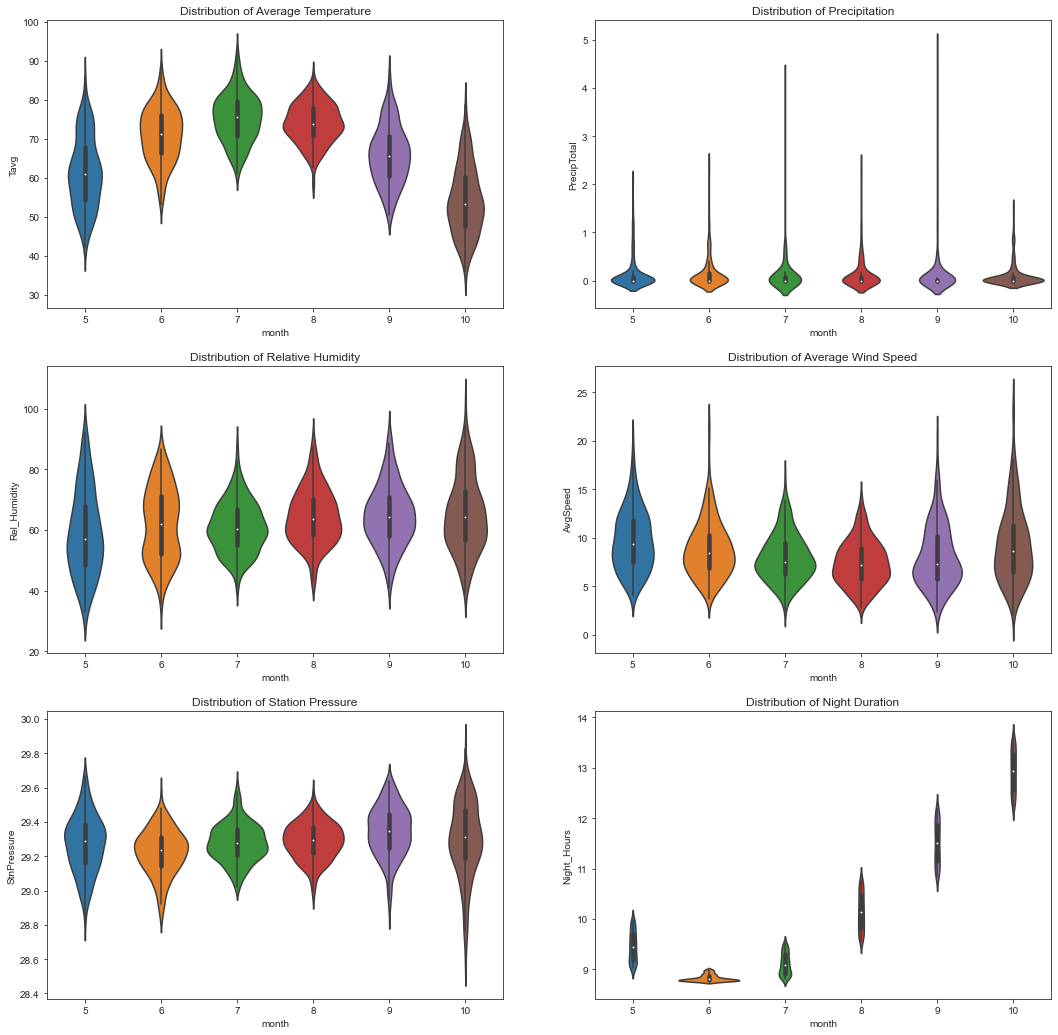

In [123]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 18))

sns.violinplot(x='month', y='Tavg',ax=ax[0][0], data=weather_combined)
ax[0][0].set_title('Distribution of Average Temperature', fontsize=12)

sns.violinplot(x='month', y='PrecipTotal', ax=ax[0][1], data=weather_combined)
ax[0][1].set_title('Distribution of Precipitation', fontsize=12)

sns.violinplot(x='month', y='Rel_Humidity',ax=ax[1][0], data=weather_combined)
ax[1][0].set_title('Distribution of Relative Humidity', fontsize=12)

sns.violinplot(x='month', y='AvgSpeed',ax=ax[1][1],data=weather_combined)
ax[1][1].set_title('Distribution of Average Wind Speed', fontsize=12)

sns.violinplot(x='month', y='StnPressure',ax=ax[2][0], data=weather_combined)
ax[2][0].set_title('Distribution of Station Pressure', fontsize=12)

sns.violinplot(x='month', y='Night_Hours', ax=ax[2][1], data=weather_combined)
ax[2][1].set_title('Distribution of Night Duration', fontsize=12)


According to literature, mosquito population density vary strongly with temperature, with hot and dry conditions favouring their growth and West Nile virus than cold and wet conditions. This is due to the temperature dependence of the development rates of eggs, larvae and pupae, as well as survival rates of female mosquitoes. 

In lower temperatures between 20 degree Celsius (68 degree Fahrenheit) and 24 degree Celsius (75.2 degree Fahrenheit), it was found that embryonation, lavae and pupal stages took longer and the female mosquitoes lived longer, as compared to higher temperature of 28 degree Celsius (84.4 degree Fahrenheit). 
https://pdfs.semanticscholar.org/1e02/57f23ef925e437a5995c1720b3a2ab518cac.pdf

Precipitation also has an influence on mosquito population, as mosquitoes breed in various types of stagnant water. Research had found high rainfall occurring several weeks before a capture event was positively correlated with the mosquito abundance. Precipitation may also negatively impact the mosquito growth as the immature stages may get washed away by heavy rainfall. 
https://parasitesandvectors.biomedcentral.com/articles/10.1186/1756-3305-6-129


From the violin plots above based on records between 2007 May and 2014 October, it can be seen that temperature and precipitation tend to peak in July which could go as high as above 90 F and 4 inches respectively, which suggest a lagging effect on the mosquito population and WNV peak seen in August. 

The wind speed is also observed to be lower in July and August during the mosquito peak season. The night hours are relatively longer in August (peak season) than July. Hence they might also be good predictors for presence of WNV. 

In [66]:
weather_combined.head()

Date   Tavg  Depart  Heat  Cool  PrecipTotal  StnPressure  ResultDir  \
0 2007-05-01  67.25    14.0   0.0   2.5          0.0       29.140       26.0   
1 2007-05-02  51.00    -3.0  13.5   0.0          0.0       29.410        3.0   
2 2007-05-03  56.75     2.0   8.0   0.0          0.0       29.425        6.5   
3 2007-05-04  61.00     4.0   7.0   0.0          0.0       29.335        7.5   
4 2007-05-05  59.75     5.0   5.0   0.0          0.0       29.430        7.0   

   AvgSpeed  Rel_Humidity  Night_Hours   FU  VCTS   SQ   DZ   BR  BCFG   TS  \
0      9.40     55.974612     9.983333  0.0   0.0  0.0  0.0  0.0   0.0  0.0   
1     13.40     71.209437     9.950000  0.0   0.0  0.0  0.0  1.0   0.0  0.0   
2     12.55     53.429105     9.916667  0.0   0.0  0.0  0.0  0.0   0.0  0.0   
3     10.60     48.932050     9.866667  0.0   0.0  0.0  0.0  0.0   0.0  0.0   
4     11.75     45.237980     9.833333  0.0   0.0  0.0  0.0  0.0   0.0  0.0   

   MIFG  VCFG   GR  TSRA   SN   HZ  FG+   FG   RA  year  month  weekofyear  
0   0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  2007      5          18  
1   0.0   0.0  0.0   0.0  0.0  1.0  0.0  0.0  0.0  2007      5          18  
2   0.0   0.0  0.0   0.0  0.0  1.0  0.0  0.0  0.0  2007      5          18  
3   0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  1.0  2007      5          18  
4   0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  2007      5          18

In [157]:
weather_combined.set_index('Date', inplace=True)

In [158]:
# create rolling averages for selected weather features on temperature and precipitation which have an effect on mosquito embryonation process
weather_combined["Tavg_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["Tavg"]
weather_combined["Tavg_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["Tavg"]
weather_combined["Depart_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["Depart"]
weather_combined["Depart_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["Depart"]
weather_combined["Heat_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["Heat"]
weather_combined["Heat_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["Heat"]
weather_combined["Cool_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["Cool"]
weather_combined["Cool_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["Cool"]
weather_combined["PrecipTotal_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["PrecipTotal"]
weather_combined["PrecipTotal_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["PrecipTotal"]
weather_combined["Rel_Humidity_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["Rel_Humidity"]
weather_combined["Rel_Humidity_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["Rel_Humidity"]
weather_combined["DZ_roll_7"] = weather_combined.rolling(window=7,min_periods=1).max()["DZ"]
weather_combined["DZ_roll_14"] = weather_combined.rolling(window=14,min_periods=1).max()["DZ"]
weather_combined["RA_roll_7"] = weather_combined.rolling(window=7,min_periods=1).max()["RA"]
weather_combined["RA_roll_14"] = weather_combined.rolling(window=14,min_periods=1).max()["RA"]
weather_combined["TSRA_roll_7"] = weather_combined.rolling(window=7,min_periods=1).max()["TSRA"]
weather_combined["TSRA_roll_14"] = weather_combined.rolling(window=14,min_periods=1).max()["TSRA"]
weather_combined["TS_roll_7"] = weather_combined.rolling(window=7,min_periods=1).max()["TS"]
weather_combined["TS_roll_14"] = weather_combined.rolling(window=14,min_periods=1).max()["TS"]
weather_combined["VCTS_roll_7"] = weather_combined.rolling(window=7,min_periods=1).max()["VCTS"]
weather_combined["VCTS_roll_14"] = weather_combined.rolling(window=14,min_periods=1).max()["VCTS"]

In [159]:
weather_combined.drop(['Tavg','Depart','Heat','Cool','PrecipTotal','Rel_Humidity','DZ','TSRA','RA','TS','VCTS'], axis =1, inplace=True)

In [160]:
weather_combined.reset_index()

Date  StnPressure  ResultDir  AvgSpeed  Night_Hours  VCFG   SN  \
0    2007-01-05       29.140       26.0      9.40     9.983333   0.0  0.0   
1    2007-01-06       29.220       16.5      6.10     8.983333   0.0  0.0   
2    2007-01-07       29.535        4.0      9.15     8.816667   0.0  0.0   
3    2007-01-08       29.315       11.0      3.90     9.566667   0.0  0.0   
4    2007-01-09       29.515       11.0      4.70    10.833333   0.0  0.0   
...         ...          ...        ...       ...          ...   ...  ...   
1467 2014-12-06       29.105       26.5      9.90     8.816667   0.0  0.0   
1468 2014-12-07       29.265       20.5     10.55     8.983333   0.0  0.0   
1469 2014-12-08       29.200       31.5     11.60     9.966667   0.0  0.0   
1470 2014-12-09       29.575       34.5     12.15    11.316667   0.0  0.0   
1471 2014-12-10       29.275       14.0      9.50    12.750000   0.0  0.0   

      MIFG   FU   GR   FG  BCFG   SQ   BR   HZ  FG+  year  month  weekofyear  \
0      0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  2007      1           1   
1      0.0  0.0  0.0  0.0   0.0  0.0  1.0  1.0  0.0  2007      1           1   
2      0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  2007      1           1   
3      0.0  0.0  0.0  0.0   0.0  0.0  0.0  1.0  0.0  2007      1           2   
4      0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  2007      1           2   
...    ...  ...  ...  ...   ...  ...  ...  ...  ...   ...    ...         ...   
1467   0.0  0.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  2014     12          49   
1468   0.0  0.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  2014     12          49   
1469   0.0  0.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  2014     12          50   
1470   0.0  0.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  2014     12          50   
1471   0.0  0.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  2014     12          50   

      Tavg_roll_7  Tavg_roll_14  Depart_roll_7  Depart_roll_14  Heat_roll_7  \
0       67.250000     67.250000      14.000000       14.000000     0.000000   
1       71.125000     71.125000      12.000000       12.000000     0.000000   
2       69.583333     69.583333       5.666667        5.666667     0.000000   
3       72.250000     72.250000       6.250000        6.250000     0.000000   
4       71.650000     71.650000       5.200000        5.200000     0.000000   
...           ...           ...            ...             ...          ...   
1467    65.535714     59.464286      -0.714286        1.571429     4.071429   
1468    67.178571     60.982143       0.285714        1.357143     3.857143   
1469    66.357143     61.035714      -0.428571       -0.285714     3.857143   
1470    62.821429     60.589286      -2.857143       -2.071429     5.857143   
1471    62.607143     61.232143      -1.571429       -2.000000     6.000000   

      Heat_roll_14  Cool_roll_7  Cool_roll_14  PrecipTotal_roll_7  \
0         0.000000     2.500000      2.500000            0.000000   
1         0.000000     6.500000      6.500000            0.100000   
2         0.000000     5.000000      5.000000            0.066667   
3         0.000000     7.625000      7.625000            0.050000   
4         0.000000     7.000000      7.000000            0.040000   
...            ...          ...           ...                 ...   
1467      8.178571     4.857143      2.892857            0.337143   
1468      7.392857     6.285714      3.642857            0.567857   
1469      7.357143     5.500000      3.678571            0.582857   
1470      7.785714     4.000000      3.678571            0.455714   
1471      7.142857     4.000000      3.678571            0.457143   

      PrecipTotal_roll_14  Rel_Humidity_roll_7  Rel_Humidity_roll_14  \
0                0.000000            55.974612             55.974612   
1                0.100000            61.181348             61.181348   
2                0.066667            60.365908             60.365908   
3                0.050000            58.970259             

#### Merge weather and train/ test dataframes

In [161]:
train.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy','Year','Month','WeekofYear'], axis=1, inplace=True)

In [162]:
train_weather = pd.merge(train,weather_combined,how='left', on='Date')
train_weather.head()

Date                 Species  Trap   Latitude  Longitude  \
0 2007-05-29  CULEX PIPIENS/RESTUANS  T002  41.954690 -87.800991   
1 2007-05-29          CULEX RESTUANS  T002  41.954690 -87.800991   
2 2007-05-29          CULEX RESTUANS  T007  41.994991 -87.769279   
3 2007-05-29  CULEX PIPIENS/RESTUANS  T015  41.974089 -87.824812   
4 2007-05-29          CULEX RESTUANS  T015  41.974089 -87.824812   

   NumMosquitos  WnvPresent  StnPressure  ResultDir  AvgSpeed  Night_Hours  \
0             1           0       29.415       17.0      6.95     9.066667   
1             1           0       29.415       17.0      6.95     9.066667   
2             1           0       29.415       17.0      6.95     9.066667   
3             1           0       29.415       17.0      6.95     9.066667   
4             4           0       29.415       17.0      6.95     9.066667   

   VCFG   SN  MIFG   FU   GR   FG  BCFG   SQ   BR   HZ  FG+  year  month  \
0   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0  1.0  1.0  0.0  2007      5   
1   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0  1.0  1.0  0.0  2007      5   
2   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0  1.0  1.0  0.0  2007      5   
3   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0  1.0  1.0  0.0  2007      5   
4   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0  1.0  1.0  0.0  2007      5   

   weekofyear  Tavg_roll_7  Tavg_roll_14  Depart_roll_7  Depart_roll_14  \
0          22         68.5     64.428571       5.714286        2.928571   
1          22         68.5     64.428571       5.714286        2.928571   
2          22         68.5     64.428571       5.714286        2.928571   
3          22         68.5     64.428571       5.714286        2.928571   
4          22         68.5     64.428571       5.714286        2.928571   

   Heat_roll_7  Heat_roll_14  Cool_roll_7  Cool_roll_14  PrecipTotal_roll_7  \
0     1.285714      3.571429          5.0          3.25            0.116429   
1     1.285714      3.571429          5.0          3.25            0.116429   
2     1.285714      3.571429          5.0          3.25            0.116429   
3     1.285714      3.571429          5.0          3.25            0.116429   
4     1.285714      3.571429          5.0          3.25            0.116429   

   PrecipTotal_roll_14  Rel_Humidity_roll_7  Rel_Humidity_roll_14  DZ_roll_7  \
0             0.072143            55.266039             51.656646        0.0   
1             0.072143            55.266039             51.656646        0.0   
2             0.072143            55.266039             51.656646        0.0   
3             0.072143            55.266039             51.656646        0.0   
4             0.072143            55.266039             51.656646        0.0   

   DZ_roll_14  RA_roll_7  RA_roll_14  TSRA_roll_7  TSRA_roll_14  TS_roll_7  \
0         0.0        1.0         1.0          1.0           1.0        0.0   
1         0.0        1.0         1.0          1.0           1.0        0.0   
2         0.0        1.0         1.0          1.0           1.0        0.0   
3         0.0        1.0         1.0          1.0           1.0        0.0   
4         0.0        1.0         1.0          1.0           1.0        0.0   

   TS_roll_14  VCTS_roll_7  VCTS_roll_14  
0         0.0          0.0           1.0  
1         0.0          0.0           1.0  
2         0.0          0.0           1.0  
3         0.0          0.0           1.0  
4         0.0          0.0           1.0

In [163]:
test_weather = pd.merge(test,weather_combined,how='left', on='Date')
test_weather.head()

Id       Date                                            Address  \
0   1 2008-11-06  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-11-06  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3 2008-11-06  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4 2008-11-06  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5 2008-11-06  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   StnPressure  ResultDir  AvgSpeed  Night_Hours  VCFG   SN  MIFG   FU   GR  \
0        29.31       18.0      10.2     8.833333   0.0  0.0   0.0  0.0  0.0   
1        29.31       18.0      10.2     8.833333   0.0  0.0   0.0  0.0  0.0   
2        29.31       18.0      10.2     8.833333   0.0  0.0   0.0  0.0  0.0   
3        29.31       18.0      10.2     8.833333   0.0  0.0   0.0  0.0  0.0   
4        29.31       18.0      10.2     8.833333   0.0  0.0   0.0  0.0  0.0   

    FG  BCFG   SQ   BR   HZ  FG+  year  month  weekofyear  Tavg_roll_7  \
0  0.0   0.0  0.0  0.0  0.0  0.0  2008     11          45    50.678571   
1  0.0   0.0  0.0  0.0  0.0  0.0  2008     11          45    50.678571   
2  0.0   0.0  0.0  0.0  0.0  0.0  2008     11          45    50.678571   
3  0.0   0.0  0.0  0.0  0.0  0.0  2008     11          45    50.678571   
4  0.0   0.0  0.0  0.0  0.0  0.0  2008     11          45    50.678571   

   Tavg_roll_14  Depart_roll_7  Depart_roll_14  Heat_roll_7  Heat_roll_14  \
0     49.285714      -0.857143       -1.142857         15.5     16.214286   
1     49.285714      -0.857143       -1.142857         15.5     16.214286   
2     49.285714      -0.857143       -1.142857         15.5     16.214286   
3     49.285714      -0.857143       -1.142857         15.5     16.214286   
4     49.285714      -0.857143       -1.142857         15.5     16.214286   

   Cool_roll_7  Cool_roll_14  PrecipTotal_roll_7  PrecipTotal_roll_14  \
0     1.428571      0.714286            0.172143             0.147143   
1     1.428571      0.714286            0.172143             0.147143   
2     1.428571      0.714286            0.172143             0.147143   
3     1.428571      0.714286            0.172143             0.147143   
4     1.428571      0.714286            0.172143             0.147143   

   Rel_Humidity_roll_7  Rel_Humidity_roll_14  DZ_roll_7  DZ_roll_14  \
0            57.231459             62.120323        0.0         1.0   
1            57.231459             62.120323        0.0         1.0   
2            57.231459             62.120323        0.0         1.0   
3            57.231459             62.120323        0.0         1.0   
4            57.231459             62.120323        0.0         1.0   

   RA_roll_7  RA_roll_14  TSRA_roll_7  TSRA_roll_14  TS_roll_7  TS_roll_14  \
0        1.0         1.0          0.0           1.0        0.0         0.0   
1        1.0         1.0          0.0           1.0        0.0         0.0   
2        1.0         1.0          0.0           1.0        0.0         0.0   
3        1.0         1.0          0.0           1.0        0.0         0.0   
4        1.0         1.0          0.0           1.0        0.0         0.0   

   VCTS_roll_7  VCTS_roll_14  
0  

#### Correlation of features with target variable

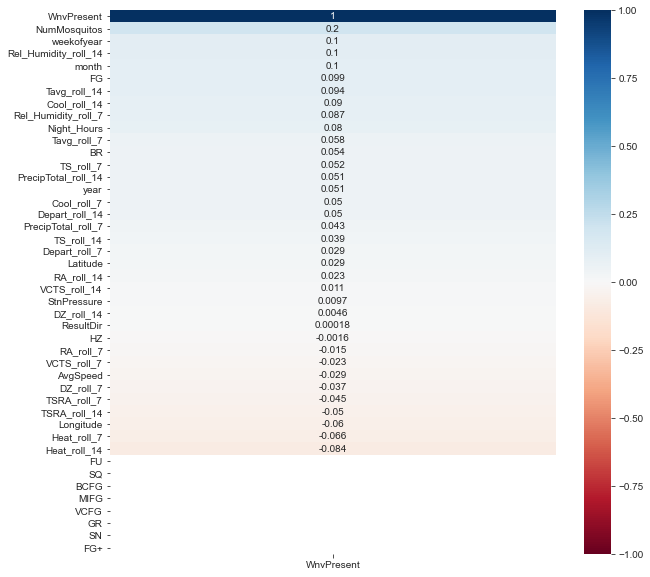

In [132]:
figure = plt.figure(figsize=(10,10))
sns.heatmap(train_weather.corr()[['WnvPresent']].sort_values('WnvPresent',ascending=False),annot=True, cmap='RdBu', center=0, vmin = -1,vmax = 1);

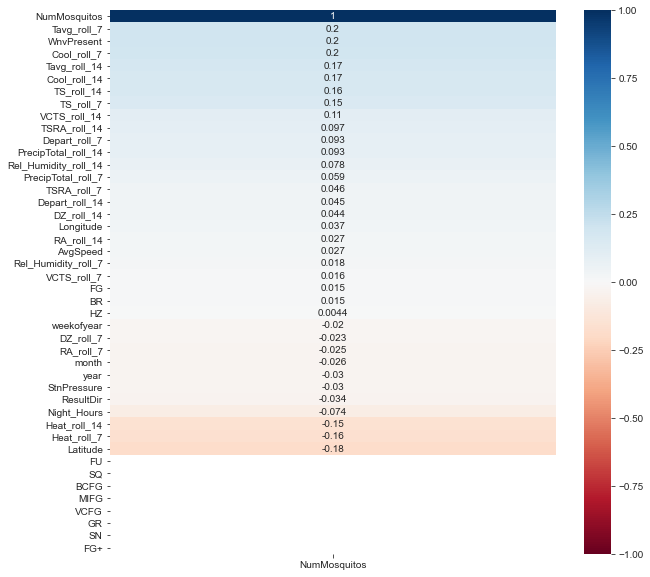

In [133]:
figure = plt.figure(figsize=(10,10))
sns.heatmap(train_weather.corr()[['NumMosquitos']].sort_values('NumMosquitos',ascending=False),annot=True, cmap='RdBu', center=0, vmin = -1,vmax = 1);

In [134]:
train_weather['SN'].describe()

count    10506.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: SN, dtype: float64

In [164]:
# Drop BCFG FG+ FU GR MIFG SN SQ VCFG weather events since they are not observed for the dates in the train dataset
train_weather.drop(['BCFG','FG+','FU','GR','MIFG','SN','SQ','VCFG'],axis=1,inplace=True)
test_weather.drop(['BCFG','FG+','FU','GR','MIFG','SN','SQ','VCFG'],axis=1,inplace=True)

#### Model Prep

In [165]:
train_weather.to_csv('../data/train_weather.csv',index = False)

In [166]:
test_weather.to_csv('../data/test_weather.csv',index = False)

In [2]:
train_weather = pd.read_csv('../data/train_weather.csv')
test_weather = pd.read_csv('../data/test_weather.csv')

In [3]:
# Applying lowercase on column names in both datasets
train_weather.columns = train_weather.columns.map(lambda x: x.lower())
test_weather.columns = test_weather.columns.map(lambda x: x.lower())

In [112]:
# Making a copy of the train weather
train_weather_copy = train_weather.copy()

In [144]:
# Making a copy of the train weather
test_weather_copy = test_weather.copy()

In [114]:
# Dropping redundant columns in train set
train_weather_copy.drop(columns = ['date','year','latitude','longitude','resultdir','stnpressure','hz'],inplace = True)

In [145]:
# Dropping redundant columns in test set
test_weather_copy.drop(columns = ['date','year','address','block','street','addressnumberandstreet','addressaccuracy','latitude','longitude','resultdir','stnpressure','hz'],inplace = True)

In [118]:
# Aggregating all species with sample size, which do not have observed WNV in train set
train_weather_copy['species'] = train_weather_copy['species'].map(lambda x: 'OTHER SPECIES' if x in ['CULEX SALINARIUS','CULEX ERRATICUS','CULEX TARSALIS','CULEX TERRITANS'] else x)

In [10]:
train_weather_copy['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'OTHER SPECIES'], dtype=object)

In [146]:
# Aggregating all species with sample size, which do not have observed WNV in test set
test_weather_copy['species'] = test_weather_copy['species'].map(lambda x: 'OTHER SPECIES' 
                                                                if x not in ['CULEX PIPIENS/RESTUANS','CULEX RESTUANS',
                                                                            'CULEX PIPIENS'] else x)

In [147]:
test_weather_copy['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'OTHER SPECIES'], dtype=object)

In [148]:
# Convert month and week variables into string datatype
train_weather_copy['month'] = train_weather_copy['month'].apply(str)
test_weather_copy['month'] = test_weather_copy['month'].apply(str)
train_weather_copy['weekofyear'] = train_weather_copy['weekofyear'].apply(str)
test_weather_copy['weekofyear'] = test_weather_copy['weekofyear'].apply(str)

In [121]:
train_weather_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   species               10506 non-null  object 
 1   trap                  10506 non-null  object 
 2   nummosquitos          10506 non-null  int64  
 3   wnvpresent            10506 non-null  int64  
 4   avgspeed              10506 non-null  float64
 5   night_hours           10506 non-null  float64
 6   fg                    10506 non-null  float64
 7   br                    10506 non-null  float64
 8   month                 10506 non-null  object 
 9   weekofyear            10506 non-null  object 
 10  tavg_roll_7           10506 non-null  float64
 11  tavg_roll_14          10506 non-null  float64
 12  depart_roll_7         10506 non-null  float64
 13  depart_roll_14        10506 non-null  float64
 14  heat_roll_7           10506 non-null  float64
 15  heat_roll_14       

In [122]:
trap_wnv = train_weather_copy[['trap','wnvpresent','nummosquitos']].groupby('trap').sum().sort_values('wnvpresent', ascending = False)

In [123]:
trap_wnv.reset_index(inplace = True)

In [124]:
trap_wnv['percent'] = (trap_wnv['wnvpresent']/trap_wnv['nummosquitos'])*100

In [125]:
no_wnv = []
for i in range(len(trap_wnv)):
    if trap_wnv['wnvpresent'][i] == 0:
        no_wnv.append(trap_wnv['trap'][i])

In [126]:
trap_wnv.sort_values('percent',ascending = False).head()

trap  wnvpresent  nummosquitos   percent
69  T005           2            50  4.000000
43  T006           4           107  3.738318
29  T143           6           230  2.608696
55  T015           4           169  2.366864
70  T107           2            86  2.325581

In [127]:
trap_wnv['trap'].apply(lambda x: 'NO WNV' if x in no_wnv else x)

0        T900
1        T115
2        T002
3        T138
4        T003
        ...  
131    NO WNV
132    NO WNV
133    NO WNV
134    NO WNV
135    NO WNV
Name: trap, Length: 136, dtype: object

In [128]:
# Listof traps w/o wnv
no_wnv

['T040',
 'T051',
 'T050',
 'T007',
 'T043',
 'T046',
 'T060',
 'T034',
 'T219',
 'T237',
 'T238',
 'T229',
 'T004',
 'T044',
 'T092',
 'T157',
 'T206',
 'T146',
 'T088',
 'T099',
 'T100',
 'T025',
 'T019',
 'T018',
 'T129',
 'T017',
 'T141',
 'T078',
 'T161',
 'T148',
 'T149',
 'T150',
 'T076',
 'T153',
 'T075',
 'T094B',
 'T072',
 'T071',
 'T001']

In [140]:
train_weather_copy['trap'] = train_weather_copy['trap'].map(lambda x: 'NO WNV' if x in no_wnv else x)

In [141]:
train_weather_copy['trap'].value_counts()

NO WNV    1016
T900       750
T115       542
T138       314
T002       185
          ... 
T070        20
T142        18
T097        17
T005        14
T054C        9
Name: trap, Length: 98, dtype: int64

In [149]:
test_weather_copy['trap'] = test_weather_copy['trap'].map(lambda x:'NO WNV' if (x in no_wnv) | (x not in train_weather_copy['trap'].unique()) else x)

In [151]:
test_weather_copy['trap'].value_counts()

NO WNV    39551
T009       1528
T035       1520
T900       1468
T002        857
          ...  
T162        760
T037        760
T077        760
T084        760
T103        760
Name: trap, Length: 98, dtype: int64

In [152]:
train_weather_copy['trap'].value_counts()

NO WNV    1016
T900       750
T115       542
T138       314
T002       185
          ... 
T070        20
T142        18
T097        17
T005        14
T054C        9
Name: trap, Length: 98, dtype: int64

In [153]:
[i for i in train_weather_copy['trap'].unique() if i not in test_weather_copy['trap'].unique()]

[]

In [143]:
test_weather_copy['trap'].unique()

array(['T002', 'non-infectious', 'T015', 'T045', 'T048', 'T049', 'T054',
       'T086', 'T091', 'T094', 'T096', 'T143', 'T159', 'T009', 'T011',
       'T016', 'T028', 'T031', 'T033', 'T089', 'T090', 'T135', 'T142',
       'T145', 'T147', 'T151', 'T152', 'T154', 'T158', 'T162', 'T218',
       'T220', 'T003', 'T006', 'T008', 'T012', 'T037', 'T047', 'T085',
       'T013', 'T014', 'T030', 'T084', 'T144', 'T160', 'T005', 'T095',
       'T035', 'T036', 'T039', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T073', 'T074', 'T077', 'T079', 'T080', 'T081',
       'T082', 'T083', 'T114', 'T155', 'T063', 'T115', 'T138', 'T200',
       'T209', 'T212', 'T215', 'T107', 'T128', 'T097', 'T102', 'T103',
       'T027', 'T156', 'T221', 'T900', 'T903', 'T222', 'T223', 'T225',
       'T227', 'T224', 'T226', 'T230', 'T228', 'T231', 'T232', 'T233',
       'T235', 'T236', 'T054C'], dtype=object)

In [154]:
train_weather_copy.drop(columns = ['nummosquitos','wnvpresent'],inplace = True)

In [155]:
# Merging train and test set(not inclusive of test's ID column)
dataset  = pd.concat(objs=[train_weather_copy, test_weather_copy.loc[:,'species':]], axis=0)

In [56]:
dataset.to_csv('../data/final_dataset_no_dm',index = False)

`dataset_dm` contains newly labelled traps

In [57]:
# Making dummy variables for the merged dataset
dataset_dm = pd.get_dummies(data = dataset)

In [58]:
# Libraries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [183]:
# To install SMOTE
!pip install imbalanced-learn 

In [69]:
from imblearn.over_sampling import SMOTE

In [59]:
# Viewing first 5 rows of merged dataset
dataset_dm.head()

avgspeed  night_hours   fg   br  tavg_roll_7  tavg_roll_14  depart_roll_7  \
0      6.95     9.066667  0.0  1.0         68.5     64.428571       5.714286   
1      6.95     9.066667  0.0  1.0         68.5     64.428571       5.714286   
2      6.95     9.066667  0.0  1.0         68.5     64.428571       5.714286   
3      6.95     9.066667  0.0  1.0         68.5     64.428571       5.714286   
4      6.95     9.066667  0.0  1.0         68.5     64.428571       5.714286   

   depart_roll_14  heat_roll_7  heat_roll_14  cool_roll_7  cool_roll_14  \
0        2.928571     1.285714      3.571429          5.0          3.25   
1        2.928571     1.285714      3.571429          5.0          3.25   
2        2.928571     1.285714      3.571429          5.0          3.25   
3        2.928571     1.285714      3.571429          5.0          3.25   
4        2.928571     1.285714      3.571429          5.0          3.25   

   preciptotal_roll_7  preciptotal_roll_14  rel_humidity_roll_7  \
0            0.116429             0.072143            55.266039   
1            0.116429             0.072143            55.266039   
2            0.116429             0.072143            55.266039   
3            0.116429             0.072143            55.266039   
4            0.116429             0.072143            55.266039   

   rel_humidity_roll_14  dz_roll_7  dz_roll_14  ra_roll_7  ra_roll_14  \
0             51.656646        0.0         0.0        1.0         1.0   
1             51.656646        0.0         0.0        1.0         1.0   
2             51.656646        0.0         0.0        1.0         1.0   
3             51.656646        0.0         0.0        1.0         1.0   
4             51.656646        0.0         0.0        1.0         1.0   

   tsra_roll_7  tsra_roll_14  ts_roll_7  ts_roll_14  vcts_roll_7  \
0          1.0           1.0        0.0         0.0          0.0   
1          1.0           1.0        0.0         0.0          0.0   
2          1.0           1.0        0.0         0.0          0.0   
3          1.0           1.0        0.0         0.0          0.0   
4          1.0           1.0        0.0         0.0          0.0   

   vcts_roll_14  species_CULEX PIPIENS  species_CULEX PIPIENS/RESTUANS  \
0           1.0                      0                               1   
1           1.0                      0                               0   
2           1.0                      0                               0   
3           1.0                      0                               1   
4           1.0                      0                               0   

   species_CULEX RESTUANS  species_OTHER SPECIES  trap_T002  trap_T002A  \
0                       0                      0          1           0   
1                       1                      0          1           0   
2                       1                      0          0           0   
3                       0                      0          0           0   
4                       1                      0          0           0   

   trap_T002B  trap_T003  trap_T005  trap_T006  trap_T008  trap_T009  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          0          0          0          0   

   trap_T011  trap_T012  trap_T013  trap_T014  trap_T015  trap_T016  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          1          0   
4          0          0          0          0          1          0   

   trap_T027  trap_T028  trap_T030  trap_T031  trap_T033  trap_T

In [60]:
# Splitting dataset_dm back into train and test set
X = dataset_dm[:train_weather_copy.shape[0]]

In [61]:
# Target variable
y = train_weather['wnvpresent']

In [91]:
# dummified test set
final_test = dataset_dm[train_weather_copy.shape[0]:]

In [92]:
# Splitting into train, validation datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify = y, test_size = 0.2)

In [93]:
# Instantiating,fit and transform standard scaler
ss=  StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [71]:
# # Accounting for imbalanced datasets
# smt = SMOTE()
# X_train_ss,y_train = smt.fit_sample(X_train_ss,y_train)

In [65]:
# Models to train
model_dict = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(),
    'bag':BaggingClassifier(),
    'svm':SVC(),
    'rf':RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'abc':AdaBoostClassifier(),
    'gbc':GradientBoostingClassifier()
}

In [66]:
# For ease of viewing results later on
model_name = {
    'lr':'Logistic Regression',
    'knn':'KNeighborsClassifier',
    'dt': 'DecisionTree',
    'bag':'BaggingClassifier',
    'svm':'Support Vector Classification',
    'rf':'Random Forest',
    'et': 'ExtraTrees Classifier',
    'abc':'AdaBoost Classifier',
    'gbc':'GradientBoost classifier'
}

In [103]:
from imblearn.pipeline import Pipeline

In [104]:
# pipelines, choosing hyperparameters and gridsearching
def pipeline(model):
    pipe = Pipeline([('over', SMOTE(random_state=42)), (model, model_dict[model])])                      
    return pipe

def params(model):
    if model == 'lr':
        return {'lr__penalty':['l1','l2','enet'],
               'lr__C':np.linspace(0.01,10,10)}
    elif model == 'knn':
        return {
            'knn__n_neighbors':[4,5,6,7]}
    elif model == 'svm':
        return {
            'svm__C':np.linspace(0.1,10,10),
            'svm__kernel':['linear','rbf'],
            'svm__gamma':['scale','auto']
        }
    elif model == 'dt':
        return {
            'dt__max_depth':[3],
            'dt__min_samples_split':[2,3,4],
            'dt__min_samples_leaf':[2,3,4]
        }
    elif model == 'bag':
        return {
            'bag__max_features':[80]
        }
        
    elif model == 'rf':
        return {
            'rf__n_estimators':[50,100,120],
            'rf__max_depth':[2,3],
            'rf__min_samples_leaf':[2,3,4]
        }
    elif model == 'et':
        return {
            'et__n_estimators':[50,100,120],
            'et__max_depth':[2,3],
            'et__min_samples_leaf':[2,3,4]
        }
    elif model == 'abc':
        return {
            'abc__n_estimators':[50,100],
            'abc__learning_rate':[0.2,0.4,0.6,0.8]
        }
    elif model == 'gbc':
        return {
            'gbc__learning_rate':[0.2,0.4,0.6],
            'gbc__min_samples_split':[4,6,8,10],
            'gbc__min_samples_leaf':[2,3,4],
            'gbc__max_depth':[3,4,5]
            
        }
    
def grid_search(model,X_train = X_train_ss,y_train = y_train,X_test = X_test_ss,y_test=y_test):
    pipe_params = params(model)
    
    pipe = pipeline(model)
    gs = GridSearchCV(pipe,param_grid = pipe_params,cv = 5,scoring = 'roc_auc')
    gs.fit(X_train,y_train)
    grid_search.test_score = gs.score(X_test_ss,y_test)
    
    print(f'Results from: {model_name[model]}')
    print(f'-----------------------------------')
    print(f'Best Hyperparameters: {gs.best_params_}')
    print(f'Mean ROC AUC Score: {round(gs.best_score_,4)}')
    print(f'Test Score: {round(grid_search.test_score,4)}')
    print(' ')
    
    tn, fp, fn, tp = confusion_matrix(y_test, gs.best_estimator_.predict(X_test)).ravel()
    print('Confusion Matrix:')
    
    print(f'True Negatives : {tn}')
    print(f'False Positives: {fp}')
    print(f'False Negatives: {fn}')
    print(f'True Positives: {tp}')
    print(' ')
          
          

#### Data Modeling

In [105]:
#1) Starting with Logistic
grid_search('lr')

Results from: Logistic Regression
-----------------------------------
Best Hyperparameters: {'lr__C': 0.01, 'lr__penalty': 'l2'}
Mean ROC AUC Score: 0.8053
Test Score: 0.7793
 
Confusion Matrix:
True Negatives : 1558
False Positives: 434
False Negatives: 43
True Positives: 67
 


In [107]:
# Analyzing importance of different features
lr = LogisticRegression(penalty = 'l2',
                       C = 0.01)
lr.fit(X_train_ss,y_train)
coef_dict = {}
for coef,feature in zip(lr.coef_.ravel(),X_train.columns):
    coef_dict[feature] = coef

In [108]:
sorted_coef_dict = {
    k:v for k,v in sorted(coef_dict.items(),key = lambda x: abs(x[1]),reverse=True)}

In [109]:
# Top 10 features that have strongest influence on predictions
{k:v for (k,v) in [x for x in sorted_coef_dict.items()][:10]}

{'trap_non-infectious': -0.3953818927229104,
 'weekofyear_34': 0.24413206584724298,
 'month_8': 0.23990629520237225,
 'night_hours': 0.23049449336253483,
 'weekofyear_23': 0.22454980578694797,
 'trap_T900': 0.22137276030186315,
 'species_CULEX RESTUANS': -0.21334960507258316,
 'species_CULEX PIPIENS': 0.1923899669517699,
 'dz_roll_14': 0.18503280717582218,
 'species_OTHER SPECIES': -0.1846680310756473}

Text(0.5, 1.0, 'Coefficients against features')

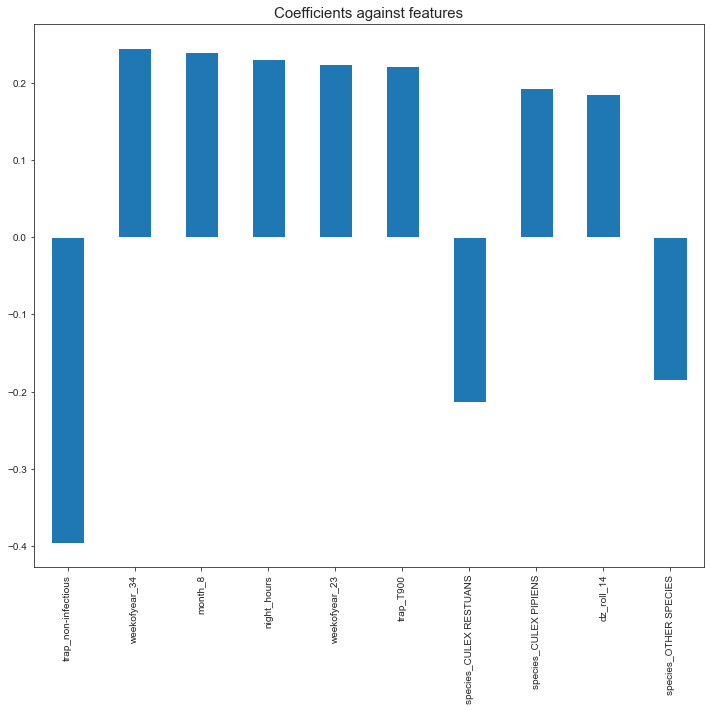

In [110]:
features = [feat for feat in sorted_coef_dict.keys()]
coefs = [coef for coef in sorted_coef_dict.values()]
plt.figure(figsize = (12,10))
pd.Series(coefs[:10],index = features[:10]).plot.bar()
plt.title('Coefficients against features',fontsize = 15)

depart values :There are values that are computed as being "normal" for a given location. They are computed based on 30 years worth of data every ten years. 

In [111]:
# 2) KNN model
grid_search('knn')

Results from: KNeighborsClassifier
-----------------------------------
Best Hyperparameters: {'knn__n_neighbors': 6}
Mean ROC AUC Score: 0.6675
Test Score: 0.6654
 
Confusion Matrix:
True Negatives : 1662
False Positives: 330
False Negatives: 67
True Positives: 43
 


In [225]:
# Decition tree model
grid_search('dt')

Results from: DecisionTree
-----------------------------------
Best Hyperparameters: {'dt__max_depth': 3, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 4}
Mean ROC AUC Score: 0.8452
Test Score: 0.7513
 
Confusion Matrix:
True Negatives : 1490
False Positives: 502
False Negatives: 39
True Positives: 71
 


In [226]:
# Bagging classifier
grid_search('bag')

Results from: BaggingClassifier
-----------------------------------
Best Hyperparameters: {'bag__max_features': 80}
Mean ROC AUC Score: 0.9875
Test Score: 0.7986
 
Confusion Matrix:
True Negatives : 1921
False Positives: 71
False Negatives: 94
True Positives: 16
 


In [208]:
# TOOK FOREVER TO RUN SO HAVE YET TO TRY THIS
grid_search('svm')

KeyboardInterrupt: 

In [231]:
grid_search('rf')

Results from: Random Forest
-----------------------------------
Best Hyperparameters: {'rf__max_depth': 3, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 120}
Mean ROC AUC Score: 0.9182
Test Score: 0.7784
 
Confusion Matrix:
True Negatives : 1512
False Positives: 480
False Negatives: 39
True Positives: 71
 


In [234]:
grid_search('et')

Results from: ExtraTrees Classifier
-----------------------------------
Best Hyperparameters: {'et__max_depth': 3, 'et__min_samples_leaf': 3, 'et__n_estimators': 50}
Mean ROC AUC Score: 0.8688
Test Score: 0.7686
 
Confusion Matrix:
True Negatives : 1363
False Positives: 629
False Negatives: 31
True Positives: 79
 


In [241]:
grid_search('abc')

Results from: AdaBoost Classifier
-----------------------------------
Best Hyperparameters: {'abc__learning_rate': 0.8, 'abc__n_estimators': 100}
Mean ROC AUC Score: 0.9837
Test Score: 0.8079
 
Confusion Matrix:
True Negatives : 1881
False Positives: 111
False Negatives: 86
True Positives: 24
 


In [242]:
grid_search('gbc')

KeyboardInterrupt: 

### Have yet to try other models such as abc and gbc! 

In [ ]:
# For a pretty table
!pip install PTable

In [ ]:
from prettytable import PrettyTable

In [ ]:
# Just for viewing's sake nothing much
class_table = PrettyTable()
class_table.field_names = [k for k in model_dict.keys()]
class_table.addrows([0.7839,0.6807,0.7737,0.7878,])
print(class_table)